# RSSI vs Distance (Pister-Hack model)

In [53]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

In [2]:
import math
c = float(3*(10**8))
f = 2.4*(10**9)

def friis(d, Pt=8, Gt=1, Gr=1, lambd=c/f):
    M = lambd / (4 * math.pi * d)
    Pr = Pt + Gt + Gr + 20*math.log(M,10)
    return Pr

In [3]:
df = pd.read_csv("../data/PEACH/hr_neighbors.csv")

df_clean = df[(df.numRxPackets > 0) & (df.numTxPackets > 0) & (df.numTxFailures >= 0) 
              & (df.rssi<0) 
              & (df.distance<500) & (df.distance>1)
             ]
df_clean.loc[:, "date"] = pd.to_datetime(df_clean.time,unit='s')
df_clean.set_index(df_clean["date"],inplace=True)

lines_removed = len(df) - len(df_clean)
print "total number of lines =", len(df)
print "number of lines removed = ", lines_removed, "(", float(lines_removed)*100/len(df), "% )"
print "Active links between ", df_clean.date[0], "and", df_clean.date[len(df_clean.date)-1]

#df_clean.head()

total number of lines = 768910
number of lines removed =  386691 ( 50.2908012641 % )
Active links between  2016-06-18 18:31:54 and 2016-07-20 22:48:18


/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
# removing non DC9008 boards
excluded_macs = ["00-17-0d-00-00-b0-00-cc", "00-17-0d-00-00-b0-00-aa", "00-17-0d-00-00-b0-00-87",
                 "00-17-0d-00-00-30-60-ef", "00-17-0d-00-00-58-32-36"
                 ]
df_reduced = df_clean[(~df_clean.mac.isin(excluded_macs)) & (~df_clean.neighborMac.isin(excluded_macs))]

#df_reduced.head()

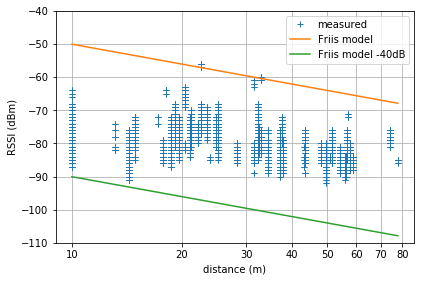

In [62]:
friis_line1_x = [df_reduced.distance.min(), df_reduced.distance.max()]
friis_line1_y = [friis(d) for d in [df_reduced.distance.min(), df_reduced.distance.max()]]
friis_line2_x = [df_reduced.distance.min(), df_reduced.distance.max()]
friis_line2_y = [friis(d) - 40 for d in [df_reduced.distance.min(), df_reduced.distance.max()]]

plt.plot(df_reduced.distance, df_reduced.rssi, '+', label="measured")
plt.plot(friis_line1_x, friis_line1_y, '-', label="Friis model")
plt.plot(friis_line2_x, friis_line2_y, '-', label="Friis model -40dB")

plt.xlabel('distance (m)')
plt.ylabel('RSSI (dBm)')
plt.legend()
plt.tight_layout()

plt.ylim([-110, -40])

plt.xscale('symlog')
ax = plt.gca()
ax.set_xticks([10, 20, 30, 40, 50, 60, 70, 80])
ax.xaxis.set_major_formatter(tkr.ScalarFormatter())
plt.grid(True)

plt.savefig("../figures/pister_hack_agri.eps", format='eps', bbox_inches='tight', pad_inches=0)